In [1]:
from collections import defaultdict

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

from scipy import spatial
import timeit
from sklearn.metrics import mean_squared_error

from scipy.sparse.linalg import svds
from scipy import sparse

In [2]:
X_train = pd.read_csv("../feature/X_train.csv")
y_train = pd.read_csv("../feature/y_train.csv")


In [3]:
X_train.head()

,user_id,business_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,...,attributes_WheelchairAccessible,attributes_WiFi,is_open,review_count_y,stars,state,cate_Restaurants,cate_Entertainment,cate_Travel,city
0,VDh1vjzpNUJH6HfcjH8g7Q,WPCgtEG-bJt0cZtnM-x7yw,4.50,0,1,0,0,0,0,0,...,1,0,1,128,4.0,17,0,0,0,13
1,3wzomxm2mM_VKuFvAol1LQ,WPCgtEG-bJt0cZtnM-x7yw,3.74,290,81,290,259,26,59,217,...,1,0,1,128,4.0,17,0,0,0,13
2,3n3HEhr_yzPUzzV_JYkziw,WPCgtEG-bJt0cZtnM-x7yw,3.37,7,0,7,4,1,2,3,...,1,0,1,128,4.0,17,0,0,0,13
3,ZCzUEzVQtT5meQctrdRD6w,WPCgtEG-bJt0cZtnM-x7yw,3.81,3,1,3,2,1,19,7,...,1,0,1,128,4.0,17,0,0,0,13
4,c28lKPf7j0cSOZHa8kno3A,WPCgtEG-bJt0cZtnM-x7yw,3.61,10,1,10,6,2,3,6,...,1,0,1,128,4.0,17,0,0,0,13


In [4]:
print(X_train.shape, '\n')
print(X_train.columns)

(150232, 59) 

Index(['user_id', 'business_id', 'average_stars', 'compliment_cool',
       'compliment_cute', 'compliment_funny', 'compliment_hot',
       'compliment_list', 'compliment_more', 'compliment_note',
       'compliment_photos', 'compliment_plain', 'compliment_profile',
       'compliment_writer', 'cool', 'fans', 'funny', 'review_count_x',
       'useful', 'date_since', 'attributes_AcceptsInsurance',
       'attributes_AgesAllowed', 'attributes_Alcohol', 'attributes_BYOB',
       'attributes_BikeParking', 'attributes_BusinessAcceptsBitcoin',
       'attributes_BusinessAcceptsCreditCards', 'attributes_ByAppointmentOnly',
       'attributes_Caters', 'attributes_CoatCheck', 'attributes_Corkage',
       'attributes_DogsAllowed', 'attributes_DriveThru',
       'attributes_GoodForDancing', 'attributes_GoodForKids',
       'attributes_HappyHour', 'attributes_HasTV', 'attributes_NoiseLevel',
       'attributes_Open24Hours', 'attributes_OutdoorSeating',
       'attributes_Restaurants

In [5]:
pd.options.display.max_columns = X_train.shape[1]
X_train.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count_x,useful,date_since,attributes_AcceptsInsurance,attributes_AgesAllowed,attributes_Alcohol,attributes_BYOB,attributes_BikeParking,attributes_BusinessAcceptsBitcoin,attributes_BusinessAcceptsCreditCards,attributes_ByAppointmentOnly,attributes_Caters,attributes_CoatCheck,attributes_Corkage,attributes_DogsAllowed,attributes_DriveThru,attributes_GoodForDancing,attributes_GoodForKids,attributes_HappyHour,attributes_HasTV,attributes_NoiseLevel,attributes_Open24Hours,attributes_OutdoorSeating,attributes_RestaurantsAttire,attributes_RestaurantsCounterService,attributes_RestaurantsDelivery,attributes_RestaurantsGoodForGroups,attributes_RestaurantsPriceRange2,attributes_RestaurantsReservations,attributes_RestaurantsTableService,attributes_RestaurantsTakeOut,attributes_Smoking,attributes_WheelchairAccessible,attributes_WiFi,is_open,review_count_y,stars,state,cate_Restaurants,cate_Entertainment,cate_Travel,city
count,150232.000000,150232.00000,150232.000000,150232.00000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.0,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.000000,150232.0,150232.000000,150232.000000,150232.000000,150232.000000
mean,3.754031,176.43745,9.472629,176.43745,122.173998,5.812077,13.621592,75.948340,76.002137,185.429589,12.076681,68.419844,909.420556,49.614183,651.844268,426.692835,1019.347256,2010.612593,-0.992565,0.009918,0.886955,3.0,0.592810,-0.858199,0.881184,-0.907110,0.202474,-0.769184,-0.899109,-0.679030,-0.919065,-0.758880,0.469674,-0.621352,0.279874,1.025015,-0.955050,0.255425,0.516122,-0.926500,-0.097489,0.561099,1.736128,0.203831,0.376631,0.547753,2.651812,0.515057,0.885830,0.862373,619.871865,3.766451,17.0,0.784447,0.090334,0.052552,3.615495
std,0.449233,659.02647,96.453304,659.02647,662.018857,52.983797,70.911829,245.576159,534.716551,644.988956,104.265938,256.055421,4490.499134,110.410389,3545.488483,712.941849,4471.081979,2.125944,0.109299,0.099094,0.914141,0.0,0.679261,0.353867,0.446133,0.326701,0.737263,0.480880,0.365322,0.610665,0.305106,0.491216,0.742144,0.753942,0.776844,1.623779,0.218242,0.747416,0.849134,0.345859,0.560984,0.802697,0.976665,0.767421,0.843505,0.782279,0.809544,0.825826,1.018352,0.344509,901.871365,0.547774,0.0,0.411207,0.286660,0.223138,5.003333
min,1.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000,-1.000000,0.000000,0.000000,3.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,100.000000,1.000000,17.0,0.000000,0.000000,0.000000,0.000000
25%,3.550000,1.00000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,66.000000,9.000000,2009.000000,-1.000000,0.000000,0.000000,3.0,0.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.0

In [6]:
biz_cols = [
       'business_id', 
       'is_open',
       'stars', ## different?
       'review_count_y', ## different
    
       'city',
       'state',
       
       'cate_Restaurants',
       'cate_Entertainment',
       'cate_Travel',
    
       'attributes_AcceptsInsurance',
       'attributes_AgesAllowed', 
       'attributes_Alcohol',
       'attributes_BYOB',
       'attributes_BikeParking', 
       'attributes_BusinessAcceptsBitcoin',
       'attributes_BusinessAcceptsCreditCards', 
       'attributes_ByAppointmentOnly', 
       'attributes_Caters',
       'attributes_CoatCheck', 
       'attributes_Corkage',
       'attributes_DogsAllowed',
       'attributes_DriveThru', 
       'attributes_GoodForDancing',
       'attributes_GoodForKids', 
       'attributes_HappyHour',
       'attributes_HasTV',  
       'attributes_NoiseLevel',
       'attributes_Open24Hours', 
       'attributes_OutdoorSeating',
       'attributes_RestaurantsAttire', 
       'attributes_RestaurantsCounterService',
       'attributes_RestaurantsDelivery',
       'attributes_RestaurantsGoodForGroups',
       'attributes_RestaurantsPriceRange2',
       'attributes_RestaurantsReservations',
       'attributes_RestaurantsTableService', 
       'attributes_RestaurantsTakeOut',
       'attributes_Smoking', 
       'attributes_WheelchairAccessible',
       'attributes_WiFi'
       ]



In [7]:
# extract business info
business = X_train[biz_cols]

print(business.shape)
# business.head()

# drop duplicates
business = business.drop_duplicates()

print(business.shape)
# business.head()

pd.options.display.max_columns = business.shape[1]
business.describe()

(150232, 40)
(10572, 40)


,is_open,stars,review_count_y,city,state,cate_Restaurants,cate_Entertainment,cate_Travel,attributes_AcceptsInsurance,attributes_AgesAllowed,attributes_Alcohol,attributes_BYOB,attributes_BikeParking,attributes_BusinessAcceptsBitcoin,attributes_BusinessAcceptsCreditCards,attributes_ByAppointmentOnly,attributes_Caters,attributes_CoatCheck,attributes_Corkage,attributes_DogsAllowed,attributes_DriveThru,attributes_GoodForDancing,attributes_GoodForKids,attributes_HappyHour,attributes_HasTV,attributes_NoiseLevel,attributes_Open24Hours,attributes_OutdoorSeating,attributes_RestaurantsAttire,attributes_RestaurantsCounterService,attributes_RestaurantsDelivery,attributes_RestaurantsGoodForGroups,attributes_RestaurantsPriceRange2,attributes_RestaurantsReservations,attributes_RestaurantsTableService,attributes_RestaurantsTakeOut,attributes_Smoking,attributes_WheelchairAccessible,attributes_WiFi
count,10572.000000,10572.000000,10572.000000,10572.000000,10572.0,10572.000000,10572.000000,10572.00000,10572.000000,10572.000000,10572.000000,10572.0,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000
mean,0.880344,3.743331,276.939936,5.055713,17.0,0.739217,0.054389,0.03689,-0.980420,0.005581,1.025918,3.0,0.601684,-0.862278,0.893114,-0.861521,0.179815,-0.806092,-0.951476,-0.721529,-0.919410,-0.796443,0.396803,-0.671207,0.203084,1.200057,-0.979663,0.179909,0.587779,-0.962826,-0.119088,0.462164,1.557132,0.120791,0.282917,0.494514,2.699395,0.381952,1.025634
std,0.324574,0.625074,341.504014,5.767515,0.0,0.439083,0.226794,0.18850,0.176938,0.074499,0.926027,0.0,0.701478,0.353031,0.420731,0.420061,0.781561,0.442994,0.257717,0.571133,0.309001,0.452235,0.814471,0.715989,0.811595,1.712908,0.149615,0.777718,0.892031,0.251077,0.610279,0.862063,1.055749,0.788045,0.871500,0.832181,0.772890,0.891826,1.118554
min,0.000000,1.000000,100.000000,0.000000,17.0,0.000000,0.000000,0.00000,-1.000000,0.000000,0.000000,3.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000
25%,1.000000,3.500000,129.000000,0.000000,17.0,0.000000,0.000000,0.00000,-1.000000,0.000000,0.000000,3.0,0.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.000000,3.000000,-1.000000,0.000000
50%,1.000000,4.000000,178.000000,3.000000,17.0,1.000000,0.000000,0.00000,-1.000000,0.000000,1.000000,3.0,1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,4.000000,292.000000,8.000000,17.0,1.000000,0.000000,0.00000,-1.000000,0.000000,2.000000,3.0,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,4.000000,-1.000000,1.000000,2.000000,-1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000
max,1.000000,5.000000,7968.000000,17.000000,17.0,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000,3.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000


In [8]:
print(business.index)
# reset the indices of business
# for convenience of indexing in biz_sim_mat
business = business.reset_index(drop=True)
print(business.index)

Int64Index([     0,     11,     18,     78,    182,    187,    216,    233,
               249,    300,
            ...
            150222, 150223, 150224, 150225, 150226, 150227, 150228, 150229,
            150230, 150231],
           dtype='int64', length=10572)
RangeIndex(start=0, stop=10572, step=1)


In [9]:
# for fast accessing index (number) given id (string)... in user
# business.index[business["business_id"] == business_id] is slow
n_biz = business.shape[0]
biz_id_index_dict = {business.loc[index, 'business_id']: index for index in range(n_biz)}

len(biz_id_index_dict) == business.shape[0]

True

In [10]:
biz_attrs = [
       'attributes_AcceptsInsurance',
       'attributes_AgesAllowed', 
       'attributes_Alcohol',
       'attributes_BYOB',
       'attributes_BikeParking', 
       'attributes_BusinessAcceptsBitcoin',
       'attributes_BusinessAcceptsCreditCards', 
       'attributes_ByAppointmentOnly', 
       'attributes_Caters',
       'attributes_CoatCheck', 
       'attributes_Corkage',
       'attributes_DogsAllowed',
       'attributes_DriveThru', 
       'attributes_GoodForDancing',
       'attributes_GoodForKids', 
       'attributes_HappyHour',
       'attributes_HasTV',  
       'attributes_NoiseLevel',
       'attributes_Open24Hours', 
       'attributes_OutdoorSeating',
       'attributes_RestaurantsAttire', 
       'attributes_RestaurantsCounterService',
       'attributes_RestaurantsDelivery',
       'attributes_RestaurantsGoodForGroups',
       'attributes_RestaurantsPriceRange2',
       'attributes_RestaurantsReservations',
       'attributes_RestaurantsTableService', 
       'attributes_RestaurantsTakeOut',
       'attributes_Smoking', 
       'attributes_WheelchairAccessible',
       'attributes_WiFi'
       ];
      
n_biz_attrs = len(biz_attrs)
print(n_biz_attrs)

31


In [11]:
# (minmax) normalize values of attributes 
business[biz_attrs] = business[biz_attrs].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) if np.max(x) != np.min(x) else 0.0)

print(business.shape)
# business.head()

pd.options.display.max_columns = business.shape[1]
business.describe()

(10572, 40)


,is_open,stars,review_count_y,city,state,cate_Restaurants,cate_Entertainment,cate_Travel,attributes_AcceptsInsurance,attributes_AgesAllowed,attributes_Alcohol,attributes_BYOB,attributes_BikeParking,attributes_BusinessAcceptsBitcoin,attributes_BusinessAcceptsCreditCards,attributes_ByAppointmentOnly,attributes_Caters,attributes_CoatCheck,attributes_Corkage,attributes_DogsAllowed,attributes_DriveThru,attributes_GoodForDancing,attributes_GoodForKids,attributes_HappyHour,attributes_HasTV,attributes_NoiseLevel,attributes_Open24Hours,attributes_OutdoorSeating,attributes_RestaurantsAttire,attributes_RestaurantsCounterService,attributes_RestaurantsDelivery,attributes_RestaurantsGoodForGroups,attributes_RestaurantsPriceRange2,attributes_RestaurantsReservations,attributes_RestaurantsTableService,attributes_RestaurantsTakeOut,attributes_Smoking,attributes_WheelchairAccessible,attributes_WiFi
count,10572.000000,10572.000000,10572.000000,10572.000000,10572.0,10572.000000,10572.000000,10572.00000,10572.000000,10572.000000,10572.000000,10572.0,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000,10572.000000
mean,0.880344,3.743331,276.939936,5.055713,17.0,0.739217,0.054389,0.03689,0.009790,0.005581,0.512959,0.0,0.800842,0.068861,0.946557,0.069240,0.589907,0.096954,0.024262,0.139236,0.040295,0.101778,0.698401,0.164397,0.601542,0.300014,0.010168,0.589955,0.293890,0.018587,0.440456,0.731082,0.511426,0.560395,0.641459,0.747257,0.899798,0.690976,0.341878
std,0.324574,0.625074,341.504014,5.767515,0.0,0.439083,0.226794,0.18850,0.088469,0.074499,0.463013,0.0,0.350739,0.176516,0.210365,0.210031,0.390781,0.221497,0.128859,0.285566,0.154501,0.226118,0.407236,0.357994,0.405798,0.428227,0.074807,0.388859,0.446015,0.125538,0.305139,0.431031,0.211150,0.394023,0.435750,0.416090,0.257630,0.445913,0.372851
min,0.000000,1.000000,100.000000,0.000000,17.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.500000,129.000000,0.000000,17.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.400000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000
50%,1.000000,4.000000,178.000000,3.000000,17.0,1.000000,0.000000,0.00000,0.000000,0.000000,0.500000,0.0,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,1.000000,0.600000,0.500000,1.000000,1.000000,1.000000,1.000000,0.333333
75%,1.000000,4.000000,292.000000,8.000000,17.0,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.500000,1.000000,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,0.333333
max,1.000000,5.000000,7968.000000,17.000000,17.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
biz_attr_val = business[biz_attrs].values
biz_attr_val.shape

(10572, 31)

In [13]:
# alternative way: 
# just calculate similarity of 2 businesses when needed
# instead of computing & then stroing similarities of all possible pairs in a matrix
def calculate_similarity(biz_1_index, biz_2_index):
    # thanks to statement "business = business.reset_index(drop=True)" (???)
    # usually default (consecutive) indices works
    l_1, l_2 = biz_attr_val[biz_1_index], biz_attr_val[biz_2_index]
    
    # any other similarity measure?
    # how to reflect the influence of review numbers for a business
    sim = 1 - spatial.distance.cosine(l_1, l_2)
    return sim

In [14]:
user_cols = [
    'user_id',
    'average_stars', 
    'compliment_cool', 
    'compliment_cute',
    'compliment_funny', 
    'compliment_hot', 
    'compliment_list',
    'compliment_more', 
    'compliment_note', 
    'compliment_photos',
    'compliment_plain', 
    'compliment_profile', 
    'compliment_writer', 
    'cool',
    'fans', 
    'funny', 
    'review_count_x', ##different
    'useful',
    'date_since'
]


In [15]:
user = X_train[user_cols]

print(user.shape)
# user.head()

# drop duplicates
user = user.drop_duplicates()

print(user.shape)
# user.head()

pd.options.display.max_columns = user.shape[1]
user.describe()

(150232, 19)
(16556, 19)


,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count_x,useful,date_since
count,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.00000,16556.000000
mean,3.762765,22.581058,1.277301,22.581058,16.826045,0.562938,1.912237,9.607272,8.552911,21.805327,1.428666,8.163385,122.397560,7.228558,91.585165,82.601051,161.80720,2011.663566
std,0.749822,260.605613,24.703059,260.605613,244.200696,12.114683,20.173730,89.876249,170.721359,249.041592,27.400352,88.040084,1492.021745,35.167493,1146.844961,218.914853,1600.18848,2.184983
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2005.000000
25%,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.00000,2010.000000
50%,3.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,3.00000,2012.000000
75%,4.210000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,3.000000,3.000000,5.000000,69.000000,21.00000,2013.000000
max,5.000000,12478.000000,2250.000000,12478.000000,19085.000000,1305.000000,1440.000000,4659.000000,10820.000000,13075.000000,2327.000000,4352.000000,67566.000000,1593.000000,65804.000000,11942.000000,68448.00000,2016.000000


In [16]:
print(user.index)
# reset the indices of business
# for convenience of indexing in biz_sim_mat
user = user.reset_index(drop=True)
print(user.index)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            150214, 150216, 150217, 150221, 150222, 150224, 150226, 150227,
            150230, 150231],
           dtype='int64', length=16556)
RangeIndex(start=0, stop=16556, step=1)


In [17]:
# for fast accessing index (number) given id (string)... in user
# user.index[user["user_id"] == user_id] is slow
n_user = user.shape[0]
user_id_index_dict = {user.loc[index, 'user_id']: index for index in range(n_user)}

len(user_id_index_dict) == user.shape[0]

True

In [18]:
# for fast accessing... in review (X_train)
n_review = X_train.shape[0]
review_uid_rindices_dict = {}
review_uid_bids_dict = {}
# https://stackoverflow.com/questions/483666/python-reverse-invert-a-mapping
for r_index in range(n_review):
    r = X_train.iloc[r_index]
    user_id = r['user_id']
    business_id = r['business_id']
    review_uid_rindices_dict.setdefault(user_id, []).append(r_index)
    review_uid_bids_dict.setdefault(user_id, []).append(business_id)
    
print(len(review_uid_rindices_dict), len(review_uid_bids_dict))


16556 16556


In [19]:
# and more...
n_biz = business.shape[0]
biz_id_star_dict = {business.loc[index, 'business_id']: business.loc[index, 'stars'] for index in range(n_biz)}
print(len(biz_id_star_dict))

n_user = user.shape[0]
user_id_star_dict = {user.loc[index, 'user_id']: user.loc[index, 'average_stars'] for index in range(n_user)}
print(len(user_id_star_dict))

10572
16556


In [20]:
R = np.zeros((user.shape[0],business.shape[0]))
R.shape

(16556, 10572)

In [22]:
# we are using the idea from the following paper
# Vozalis M G, Margaritis K G. Applying SVD on Generalized Item-based Filtering[J]. IJCSA, 2006, 3(3): 27-51.

n_review = X_train.shape[0]
for r_index in range(n_review):
    r = X_train.iloc[r_index]
    user_id = r['user_id']
    business_id = r['business_id']
    
    user_index = user_id_index_dict[user_id]
    business_index = biz_id_index_dict[business_id]
    
    star = y_train.iloc[r_index]['stars']
    
    R[user_index][business_index] = star
    
print(R)

[[4. 2. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 5. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [23]:
# https://stackoverflow.com/questions/38542548/numpy-mean-of-nonzero-values
row_nz_mean = np.true_divide(R.sum(1),(R!=0).sum(1))
col_nz_mean = np.true_divide(R.sum(0),(R!=0).sum(0))
print(row_nz_mean.shape, col_nz_mean.shape)

(16556,) (10572,)


In [24]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.copy.html
# R_zero_idx = np.copy(R) # MUST be DEEP copy

R_zero_idx = np.ones(R.shape)
R_zero_idx[R!=0] = 0

print(R_zero_idx)

[[0. 0. 1. ... 1. 1. 1.]
 [0. 1. 1. ... 1. 1. 1.]
 [0. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


In [25]:
# we are using the idea from the following paper
# Vozalis M G, Margaritis K G. Applying SVD on Generalized Item-based Filtering[J]. IJCSA, 2006, 3(3): 27-51.


R_fi =  np.copy(R) 

R_fi += R_zero_idx * col_nz_mean.reshape(1,-1) # note *
print(R_fi.mean(0) == col_nz_mean, '\n' ) # quite strage
print('col operation: \n', R_fi, '\n')

R_fi -= row_nz_mean.reshape(-1,1)

R_norm = R_fi
print('row operation: \n', R_norm, '\n')


[False False False ...  True  True  True] 

col operation: 
 [[4.         2.         4.16666667 ... 4.         5.         4.        ]
 [5.         4.14285714 4.16666667 ... 4.         5.         4.        ]
 [5.         4.14285714 4.16666667 ... 4.         5.         4.        ]
 ...
 [4.54545455 4.14285714 4.16666667 ... 4.         5.         4.        ]
 [4.54545455 4.14285714 4.16666667 ... 4.         5.         4.        ]
 [4.54545455 4.14285714 4.16666667 ... 4.         5.         4.        ]] 

row operation: 
 [[ 1.         -1.          1.16666667 ...  1.          2.
   1.        ]
 [ 1.15151515  0.29437229  0.31818182 ...  0.15151515  1.15151515
   0.15151515]
 [ 1.21428571  0.35714286  0.38095238 ...  0.21428571  1.21428571
   0.21428571]
 ...
 [ 1.54545455  1.14285714  1.16666667 ...  1.          2.
   1.        ]
 [-0.45454545 -0.85714286 -0.83333333 ... -1.          0.
  -1.        ]
 [ 0.54545455  0.14285714  0.16666667 ...  0.          1.
   0.        ]] 



In [26]:
R_norm.mean()

0.018597313147153578

In [27]:
# just pick all main latent factors ??
# need to check...
# what if the number of latent factors k is very large ??

R_red = np.copy(R_norm)
R_red.mean()

0.018597313147153578

In [28]:
u_mat, s_arr, vt_mat = svds(R_norm)
print(u_mat.shape, s_arr.shape, vt_mat.shape)

(16556, 6) (6,) (6, 10572)


In [29]:
s_sqrt_arr = np.sqrt(s_arr)
print(s_sqrt_arr)
# s_sqrt_mat = np.zeros((s_arr.shape[0],s_arr.shape[0]))
# for i in range(s_sqrt_arr.shape[0]):
#     s_sqrt_mat[i, i] = s_sqrt_arr[i]
# print(s_sqrt_mat)

[  5.2636743    5.27456925   5.57464349   5.62908588  79.9631134
 107.28786969]


In [30]:
MR = np.zeros((s_sqrt_arr.shape[0], business.shape[0]))
for j in range(business.shape[0]):
    MR[:, j] = s_sqrt_arr.reshape(1,-1) * vt_mat[:, j].reshape(1,-1)
    
MR.shape

(6, 10572)

In [38]:
# it is very time-consuming
# to save the results, there will be a 2.8GB file

svd_sim_mat = np.diag(np.ones(business.shape[0]))

for i in range(business.shape[0]-1):
    if i % 1000 == 0:
        print(i)
        
    l_1 = MR[:,i]
    
    for j in range(i+1, business.shape[0]):
        
        l_2 = MR[:,j]
        
        sim = 1 - spatial.distance.cosine(l_1, l_2)
        svd_sim_mat[i,j] = sim
        svd_sim_mat[j,i] = sim
        
np.savetxt("svd_sim_mat.txt", svd_sim_mat)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [40]:
# load from storage instead of gereneting this expensive item-item similarity matrix again
ssm = np.loadtxt("svd_sim_mat.txt")
ssm.shape

(10572, 10572)

In [41]:
def knn(business_index, k):
#     l = MR[:,business_index]
#     n_biz = business.shape[0]
#     # any other similarity measure?
#     # how to reflect the influence of review numbers for a business
#     sims = [1 - spatial.distance.cosine(l, MR[:,i]) for i in range(n_biz)]
    sims = list(svd_sim_mat[business_index,:])
    top_k = list(np.argsort(sims)[-(k+1):-1])
    return top_k, [sims[i] for i in top_k]

In [87]:
knn(0,4)

([5547, 7753, 3143, 6836],
 [0.9999992851148316,
  0.9999997016462815,
  0.9999997513099941,
  0.9999999171699359])

In [43]:
Y_bar      = y_train['stars'].mean()
Y_user_bar = user['average_stars'].mean()
Y_biz_bar  = business['stars'].mean()
print(Y_bar, Y_user_bar, Y_biz_bar)

3.7641447893924065 3.7627645566561974 3.7433314415437002


In [54]:
# # ver 1
# def pred_baseline(user_id, business_id):
# # credit to henryachen 
# # https://gist.github.com/henryachen/a5fb0281c1715e83aaef
#     pred = Y_bar

#     try:
#         user_index = user_id_index_dict[user_id]
#         #print('--0: ', user_index)
        
#         u = user.loc[[user_index],:]# user[user.index == user_index]
#         #print('--1: ', type(u))
#         pred += u['average_stars'].values[0] - Y_user_bar
#         #print('--2: ', u['average_stars'].values[0])
#     except:
#         pred += 0
    
#     try:
#         business_index = biz_id_index_dict[business_id]
#         #print('--0: ', business_index)
#         m = business.loc[[business_index],:]
#         #print('--1: ', type(m))
#         pred += m['stars'].values[0]         - Y_biz_bar
#         #print('--2: ', m['stars'].values[0])
#     except:
#         pred += 0
        
#     return pred

# ver 2
# without using df.loc() to query pandas dataframes (user and business here)
def pred_baseline(user_id, business_id):
# credit to henryachen 
# https://gist.github.com/henryachen/a5fb0281c1715e83aaef
    pred = Y_bar

    try:        
        pred += user_id_star_dict[user_id] - Y_user_bar
    except:
        pred += 0
    
    try:
        pred += biz_id_star_dict[business_id] - Y_biz_bar
    except:
        pred += 0
        
    return pred

In [69]:
print('Example 0: \n')
print('real:     ', y_train.loc[0, 'stars'], '\n')
print('baseline: ', pred_baseline(X_train.loc[0, 'user_id'], X_train.loc[0, 'business_id']), '\n')


Example 0: 

real:      4.0 

baseline:  4.758048791192509 



In [53]:
def pred_more(user_id, business_id):
# credit to henryachen 
# https://gist.github.com/henryachen/a5fb0281c1715e83aaef
#     pred_base = pred_baseline(user_id, business_id)
    
#     q = X_train[X_train['user_id'] == user_id] # query X_train, not user
#     # note the differences
#     biz_ids          = q['business_id'].values.tolist()
#     review_indices = q.index.values.tolist() # review index in y_train, not biz index in business
    try:
        review_indices = review_uid_rindices_dict[user_id]
        biz_ids = review_uid_bids_dict[user_id]
        sz = len(biz_ids)
    except:
        return 0 #pred_base
    
    # business_index_TEMP = business.index[business["business_id"] == business_id] # might be not found
    try: 
        business_index = biz_id_index_dict[business_id]
    except:
        return 0 #pred_base
    
#     if sz == 0 or business_index_TEMP.shape[0] == 0: # two conditions
#         return pred_base
#     else:

    # weighted average
    den, num = 0, 0
    for i in range(sz):
        #
        biz_id = biz_ids[i]
        # biz_index  = business.index[business["business_id"] == biz_id].values[0]
        try:
            biz_index  = biz_id_index_dict[biz_id]
        except:
            continue # for for-loop?
        #
        review_index = review_indices[i]
        Y_user_biz = y_train.loc[review_index, 'stars']
        #
        # sim = biz_sim_mat[business_index, biz_index]
        sim = calculate_similarity(business_index, biz_index)
        pb = pred_baseline(user_id, biz_id)
        den += sim
        num += sim * (Y_user_biz - pb)
            
    if den != 0:
        return num / den
    else:
        return 0

In [71]:
print('Example 0')
print('real:     ', y_train.loc[0, 'stars'])
print('baseline: ', pred_baseline(X_train.loc[0, 'user_id'], X_train.loc[0, 'business_id']))
print('more:     ', pred_more(X_train.loc[0, 'user_id'], X_train.loc[0, 'business_id']))

Example 0
real:      4.0
baseline:  4.758048791192509
more:      -1.4813584318082968


In [55]:
def pred_svd_base(user_id, business_id):
    
    try: 
        return user_id_star_dict[user_id]
    except:
        return Y_user_bar

In [78]:
def pred_svd(user_id, business_id, k=20):
    
    #try: 
    #    base = user_id_star_dict[user_id]
    #except:
    #    base = Y_user_bar
    base = 0
    
    try: 
        user_index = user_id_index_dict[user_id]
        
        business_index = biz_id_index_dict[business_id]

    except:
        return base 
    
    #k=20
    nns, nn_sims = knn(business_index, k)
    num, dom = 0, 0
    for i in range(len(nns)):
        num +=         nn_sims[i] * R_red[user_index, nns[i]]
        dom += np.sqrt(nn_sims[i]) # abs
    
    if dom != 0:
        return base + num / dom
    else:
        return base

In [63]:
validation = pd.read_csv("../data/validate_queries.csv")

X_val = validation[["user_id","business_id"]] # pandas dataframe
y_val = validation["stars"].values # numpy array

In [76]:
def run_test(X, f):
    sz = X.shape[0]
    y_pd = np.zeros(sz)

    for i in range(sz):
        if i % 10000 == 0:
           print(i) 
        q = X.iloc[i]
        p = f(q['user_id'], q['business_id'])
        y_pd[i] = p

    plt.hist(y_pd)
    return y_pd

In [77]:
y_pd_base = run_test(X_val, pred_baseline)

0
10000
20000
30000
40000
50000


In [90]:
mean_squared_error(y_pd_base, y_val)

1.3306661804658158

In [91]:
y_pd_svd = run_test(X_val, pred_svd)

0
10000
20000
30000
40000
50000


In [92]:
sz = 100
rl, el = [], []

for r in range(-2*sz, 2*sz):
    y_pd = [y_pd_base[i] + r/sz * y_pd_svd[i] for i in range(len(y_pd_svd))]
    rl.append(r/sz)
    el.append(mean_squared_error(y_pd, y_val))
    
idx = np.argsort(el)[0]
print('good ratio:', rl[idx], ', good mse:', el[idx])


good ratio: -0.02 , good mse: 1.3306203057240025


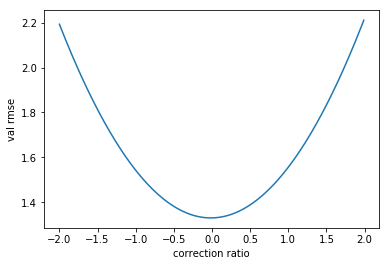

In [94]:
plt.plot(rl, el)
plt.xlabel('correction ratio')
plt.ylabel('val rmse')
plt.show()

In [ ]:
# the improvement is not obvious...
# need to figure out the reason later...